<a href="https://colab.research.google.com/github/melhamdani/-Stamp-Prices/blob/main/project_6_CNN_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN project





## Problem Definition


  This project aims to create a deep learning model to identify whether an image is of a cat or a dog. The goal is to teach the model to recognize features in pictures and classify them correctly. It involves:
Input: Images of cats and dogs.
Output: A prediction of "cat" or "dog" for each image.
Goal: Build an accurate model to correctly classify new, unseen images as either a cat or a dog.


* Load necessary packages.



https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg

#**Imports**

In [1]:
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data Collection


In [2]:
# Import required libraries
import urllib.request
import pandas as pd  # Import pandas for handling pickle files

# URLs of the files
url_x = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle"
url_y = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle"
url_Z = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg"


* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [3]:

# Load pickled data
x_pickle_data = pd.read_pickle(url_x)
y_pickle_data = pd.read_pickle(url_y)

print("Pickle files loaded successfully!")


Pickle files loaded successfully!


In [4]:
x_pickle_data = np.array(x_pickle_data)
y_pickle_data = np.array(y_pickle_data)

In [5]:
type(x_pickle_data)
type(y_pickle_data)

numpy.ndarray

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [6]:
x_pickle_data_scaled = x_pickle_data / 255
x_pickle_data.shape

(24946, 100, 100, 1)

In [7]:
y_pickle_data.shape

(24946,)

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot a few ( >5 ) of the images in X using plt.imshow().

* Look at the response values in y for those images.

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.



In [8]:
num_images = x_pickle_data_scaled.shape[0]
num_images
random_indices = np.random.choice(num_images, size=5, replace=False)
random_indices

array([17682, 18223,  5469, 17466, 23722])

In [9]:
random_images = x_pickle_data_scaled[random_indices]
random_images.shape[:]


(5, 100, 100, 1)

In [10]:
y = y_pickle_data[random_indices]
y = y.reshape(-1, 1)
y.shape

(5, 1)

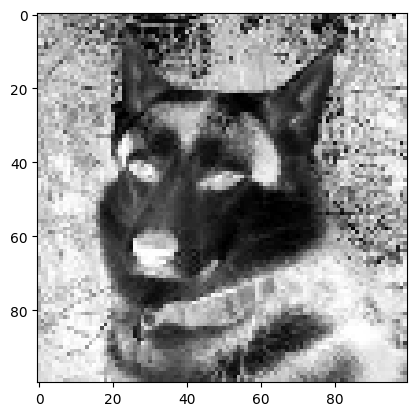

[0]


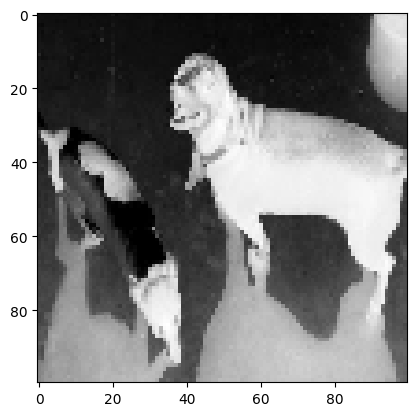

[0]


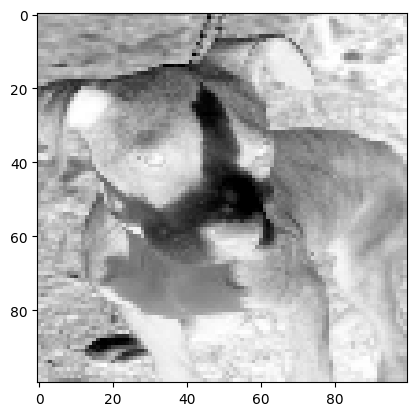

[0]


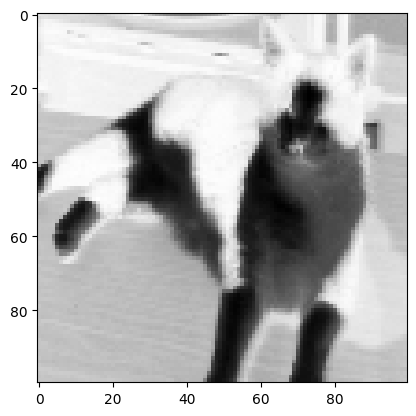

[1]


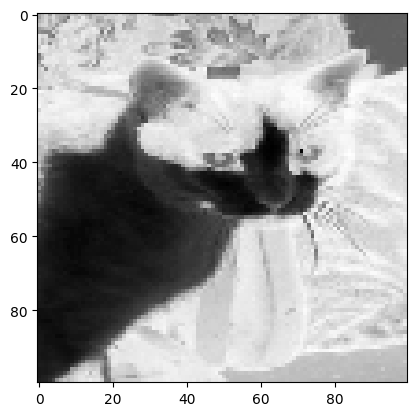

[1]


In [11]:
for i in range(5):
    plt.imshow(random_images[i],cmap=plt.cm.gray_r)
    plt.show()
    print(y[i])


In [12]:
print(y[0])
print(y[1])
print(y[2])
print(y[3])
print(y[4])

[0]
[0]
[0]
[1]
[1]


## Data Processing



* Split X and y into training and testing sets.

*  Build a convolutional neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Plot the distribution of probabilities for the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



Start the model as a feed forward (sequential) model.

In [13]:
model = Sequential()

In [14]:
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(100, 100, 1),
    )
)
model.add(
    MaxPooling2D(
        pool_size=(2, 2),
    )
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Flatten data to be used in output layer
model.add(
    Flatten()
)


### Compile model

In [16]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

### Fitting a convolutional neural network

### Fit model

In [31]:
#fit
x_train, x_test, y_train, y_test = train_test_split(x_pickle_data_scaled, y_pickle_data, test_size=0.2, random_state=42)
x_train.shape


(19956, 100, 100, 1)

In [38]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)  # Replace 10 with the number of classes
y_test = to_categorical(y_test, num_classes=10)
x_train.shape


In [39]:
# Fit model
model.fit(x_train, y_train, epochs=8)


Epoch 1/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 116s 186ms/step - accuracy: 0.5931 - loss: 0.7132
Epoch 2/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 145s 190ms/step - accuracy: 0.7420 - loss: 0.5231
Epoch 3/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 108s 173ms/step - accuracy: 0.7807 - loss: 0.4601
Epoch 4/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 151s 189ms/step - accuracy: 0.8194 - loss: 0.4091
Epoch 5/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 151s 204ms/step - accuracy: 0.8378 - loss: 0.3730
Epoch 6/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 123s 173ms/step - accuracy: 0.8586 - loss: 0.3324
Epoch 7/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 140s 171ms/step - accuracy: 0.8788 - loss: 0.2986
Epoch 8/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 143s 173ms/step - accuracy: 0.8902 - loss: 0.2738


In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 98, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 76832)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         768,330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,305,952 (8.80 MB)

 Trainable params: 768,650 (2.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,537,302 (5.86 MB)

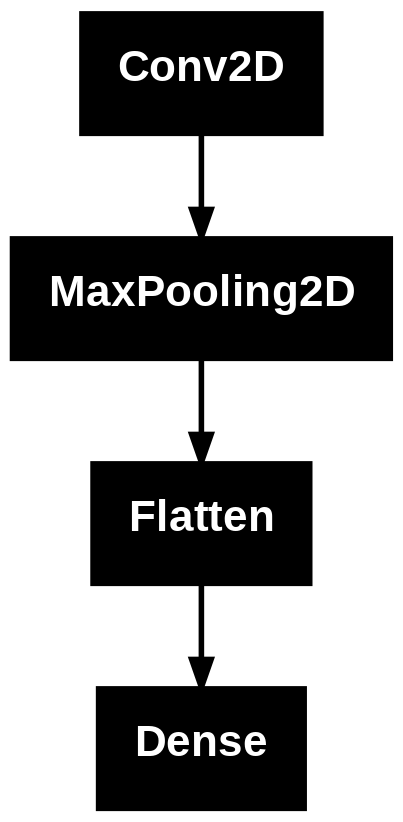

In [42]:
plot_model(model)

In [43]:
x_train.shape

(19956, 100, 100, 1)

In [44]:
# Change test set to 4-D
#x_test2 = x_test.reshape( x_test.shape + (1,) )

x_test2 = x_test.reshape(x_test.shape[0], 100, 100, 1)
# Evaluate model



In [45]:
# make predictions based on testing set
predictions = model.predict(x_test2)

156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step


In [46]:
predictions.shape

(4990, 10)

0: 17.59
1: 82.41
2: 0.00
3: 0.00
4: 0.00
5: 0.00
6: 0.00
7: 0.00
8: 0.00
9: 0.00
1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


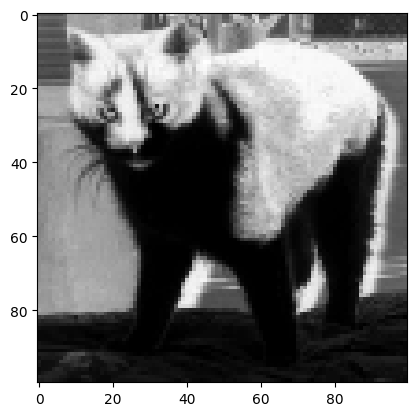

In [58]:
i = 1
for k, x in enumerate(predictions[i] * 100):
    print(f"{k}: {x:.2f}")  # Ensure `x` is a scalar
print(np.argmax(predictions[i]))
print(y_test[i])
plt.imshow(x_test[i], cmap=plt.cm.gray_r)
plt.show()




## Communication of Results



* Communicate the results of your analysis.



## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import numpy as np

# Example dataset (replace this with your actual data)
# X is the feature dataset, y is the label dataset
X = np.random.rand(1000, 100, 100, 1)  # Replace with actual data
y = np.random.randint(0, 10, 1000)     # Replace with actual labels

# One-hot encode the labels if needed
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=10)

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')  # Adjust for the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))



Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 481ms/step - accuracy: 0.1250 - loss: 5.7980 - val_accuracy: 0.0650 - val_loss: 3.0607
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - accuracy: 0.1506 - loss: 2.3844 - val_accuracy: 0.0700 - val_loss: 2.3781
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.3736 - loss: 2.0148 - val_accuracy: 0.1100 - val_loss: 2.3379
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - accuracy: 0.8552 - loss: 1.5297 - val_accuracy: 0.0750 - val_loss: 2.4327
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 0.9946 - loss: 0.8298 - val_accuracy: 0.1300 - val_loss: 2.4853
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 1.0000 - loss: 0.3924 - val_accuracy: 0.0750 - val_loss: 2.4210
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 1.0000 - loss: 0.1622 - val_accuracy: 0.0850 - val_loss: 2.4300
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 1.0000 - loss: 0.0868 - val_accuracy: 

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions on the validation data
val_predictions = model.predict(val_data)

# Convert predictions and true labels to class indices (if using one-hot encoding)
val_predictions = np.argmax(val_predictions, axis=1)
val_labels = np.argmax(val_labels, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(val_labels, val_predictions))

# Generate and display the confusion matrix
cm = confusion_matrix(val_labels, val_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

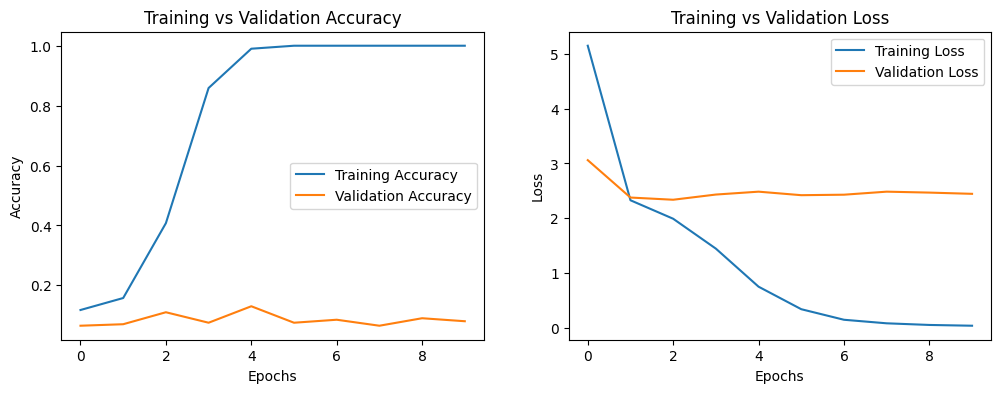

In [48]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


#Conclusion


This project shows how deep learning can solve image classification problems. By training a model to recognize cats and dogs, we learn how computers can identify patterns in pictures. The result is a model that can correctly classify new images, proving the effectiveness of deep learning in tasks like image recognition.